<a href="https://colab.research.google.com/github/zzhining/deeplearing_basic/blob/main/blackpink_image_scraping_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 수집 및 전처리


In [ ]:
# 코드1
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 5.1 MB/s 
     |████████████████████████████████| 358 kB 58.2 MB/s 
     |████████████████████████████████| 138 kB 61.4 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 4.0 MB 40.4 MB/s 
     |████████████████████████████████| 58 kB 6.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://se

In [ ]:
# 코드2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 코드3
import os
os.chdir("/content/drive/My Drive")

In [ ]:
# 코드4
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.request import (urlopen, urlparse, urlunparse, urlretrieve)
import time
import pathlib
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# 코드5
def selenium_scroll_option(driver):
    SCROLL_PAUSE_SEC = 3
  
    # 현재 스크롤 높이
    last_height = driver.execute_script("return document.body.scrollHeight")
    
    while True:
        # 끝까지 스크롤 다운
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # 대기
        time.sleep(SCROLL_PAUSE_SEC)

        # 스크롤 다운 후 스크롤 높이
        new_height = driver.execute_script("return document.body.scrollHeight")
    
        if new_height == last_height:
            break
        last_height = new_height

In [ ]:
# 코드6
def download_image(image_name):
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')     
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver', options=options)
    driver.get('http://www.google.co.kr/imghp?hl=ko')

    browser = driver.find_element_by_name("q")
    browser.send_keys(image_name)
    browser.send_keys(Keys.RETURN)

    selenium_scroll_option(driver)

    print('{} 이미지 다운로드 시작'.format(image_name))
    # 이미지 url 추가
    images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd") 
    images_url = []
    for i in images:    
        if i.get_attribute('src')!= None :
                images_url.append(i.get_attribute('src'))
        else :
            images_url.append(i.get_attribute('data-src'))

    # 겹치는 이미지 url 제거
    print("다운로드한 이미지 개수: {}".format(len(pd.DataFrame(images_url)[0].unique())))
    images_url=pd.DataFrame(images_url)[0].unique()

    train_dir = f"{os.getcwd()}/train"
    if not os.path.isdir(train_dir):
        os.mkdir(train_dir)

    test_dir = f"{os.getcwd()}/test"
    if not os.path.isdir(test_dir):
        os.mkdir(test_dir)

    train_img_dir = train_dir + '/' + image_name
    test_img_dir = test_dir + '/' + image_name

    if not os.path.isdir(train_img_dir):
        os.mkdir(train_img_dir)

    if not os.path.isdir(test_img_dir):
        os.mkdir(test_img_dir)

    # 이미지 다운로드   
    for t, url in enumerate(images_url, 0): 
        if t < 300:      
            urlretrieve(url, train_img_dir + '/' +  str(t) + '.jpg')
        elif t < 390:
            urlretrieve(url, test_img_dir + '/' +  str(t) + '.jpg')
    driver.close()

In [ ]:
# 코드7
# 키워드 검색하기
search_name_list = ['제니', '지수', '로제', '리사']

for image_name in search_name_list:
    download_image(image_name)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  # Remove the CWD from sys.path while we load stuff.


제니 이미지 다운로드 시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


다운로드한 이미지 개수: 371


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  # Remove the CWD from sys.path while we load stuff.


지수 이미지 다운로드 시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


다운로드한 이미지 개수: 400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  # Remove the CWD from sys.path while we load stuff.


로제 이미지 다운로드 시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


다운로드한 이미지 개수: 400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  # Remove the CWD from sys.path while we load stuff.


리사 이미지 다운로드 시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


다운로드한 이미지 개수: 399


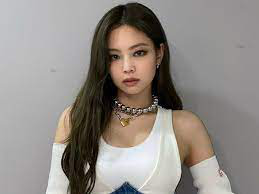

In [ ]:
# 코드8
import PIL
img_dir = f"{os.getcwd()}/train" + '/' + '제니'
PIL.Image.open(str(img_dir + '/0.jpg'))

In [ ]:
# 코드9
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
       'train',
       target_size=(224, 224),
       batch_size=10,
       class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       'test',
       target_size=(224, 224),
       batch_size=10,
       class_mode='categorical')

Found 1161 images belonging to 4 classes.
Found 180 images belonging to 4 classes.


In [ ]:
# 코드10
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer_model.trainable = False
# transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(4, activation='softmax'))
finetune_model.summary()

finetune_model.compile(loss='categorical_crossentropy',
                       optimizer=optimizers.Adam(learning_rate=0.0002),
                       metrics=['accuracy'])

history = finetune_model.fit_generator(
       train_generator,
       steps_per_epoch=100,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 16,320,644
Trainable params: 1,605,956
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
100/100 [==============================] - 107s 159ms/step - loss: 1.4297 - accuracy: 0.3199 - val_loss: 1.4756 - val_accuracy: 0.2500
Epoch 2/100
100/100 [==============================] - 16s 155ms/step - loss: 1.2083 - accuracy: 0.4884 - val_loss: 1.3803 - val_accuracy: 0.4100
Epoch 3/100
100/100 [==============================] - 15s 150ms/step - loss: 1.1217 - accuracy: 0.5328 - val_loss: 1.4412 - val_accuracy: 0.3600
Epoch 4/100
100/100 [==============================] - 16s 163ms/step - loss: 1.0056 - accuracy: 0.6105 - val_loss: 1.3797 - val_accuracy: 0.3900
Epoch 5/100
100/100 [==============================] - 16s 160ms/step - loss: 0.9771 - accuracy: 0.5974 - val_loss: 1.3932 - val_accuracy: 0.3700
Epoch 6/100
100/100 [==============================] - 16s 156ms/step - loss: 0.8688 - accuracy: 0.6771 - val_loss: 1.3828 - val_accuracy: 0.4800
Epoch 7/100
100/100 [==============================] - 15s 154ms/step - loss: 0.8104 - accuracy: 0.7064 - val_loss: 1.2764 

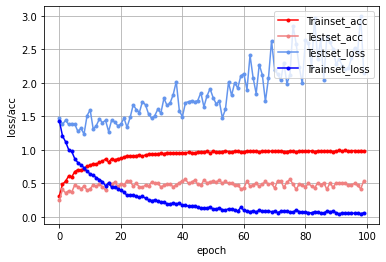

In [ ]:
# 코드11
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
# 코드112
from tensorflow.keras.applications import ResNet101

transfer_model2 = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer_model2.trainable = False
# transfer_model.summary()

finetune_model2 = models.Sequential()
finetune_model2.add(transfer_model2)
finetune_model2.add(Flatten())
finetune_model2.add(Dense(64, activation='relu'))
finetune_model2.add(Dense(4, activation='softmax'))
finetune_model2.summary()

finetune_model2.compile(loss='categorical_crossentropy',
                       optimizer=optimizers.Adam(learning_rate=0.0002),
                       metrics=['accuracy'])

history = finetune_model2.fit_generator(
       train_generator,
       steps_per_epoch=100,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10)


171458560/171446536 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                6422592   
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 49,081,028
Trainable params: 6,422,852
Non-trainable params: 42,658,176
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 25s 182ms/step - loss: 1.7048 - accuracy: 0.2543 - val_loss: 1.4793 - val_accuracy: 0.2900
Epoch 2/100
100/100 [==============================] - 16s 163ms/step - loss: 1.4912 - accuracy: 0.2745 - val_loss: 1.5421 - val_accuracy: 0.2600
Epoch 3/100
100/100 [==============================] - 16s 163ms/step - loss: 1.4323 - accuracy: 0.2836 - val_loss: 1.3859 - val_accuracy: 0.1900
Epoch 4/100
100/100 [==============================] - 16s 163ms/step - loss: 1.3842 - accuracy: 0.2422 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/100
100/100 [==============================] - 17s 168ms/step - loss: 1.3863 - accuracy: 0.2503 - val_loss: 1.3862 - val_accuracy: 0.2200
Epoch 6/100
100/100 [==============================] - 16s 163ms/step - loss: 1.3862 - accuracy: 0.2402 - val_loss: 1.3859 - val_accuracy: 0.2600
Epoch 7/100
100/100 [==============================] - 16s 162ms/step - loss: 1.3875 - accuracy: 0.2573 - val_loss: 1.3825 - val_accurac

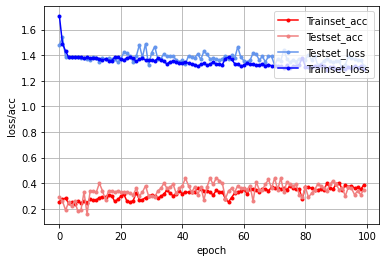

In [ ]:
 # 코드11
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
# 코드12
from tensorflow.keras.applications import ResNet101

transfer_model2 = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer_model2.trainable = True
# transfer_model.summary()

finetune_model2 = models.Sequential()
finetune_model2.add(transfer_model2)
finetune_model2.add(Flatten())
finetune_model2.add(Dense(64, activation='relu'))
finetune_model2.add(Dense(128, activation='relu'))
finetune_model2.add(Dense(4, activation='softmax'))
finetune_model2.summary()

finetune_model2.compile(loss='categorical_crossentropy',
                       optimizer=optimizers.Adam(learning_rate=0.0001),
                       metrics=['accuracy'])

history = finetune_model2.fit_generator(
       train_generator,
       steps_per_epoch=100,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                6422592   
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 4)                 516       
                                                                 
Total params: 49,089,604
Trainable params: 48,984,260
Non-trainable params: 105,344
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 38s 256ms/step - loss: 1.3176 - accuracy: 0.4950 - val_loss: 2.9693 - val_accuracy: 0.2400
Epoch 2/100
100/100 [==============================] - 24s 234ms/step - loss: 0.7515 - accuracy: 0.6942 - val_loss: 2.6534 - val_accuracy: 0.2700
Epoch 3/100
100/100 [==============================] - 23s 228ms/step - loss: 0.5617 - accuracy: 0.7931 - val_loss: 3.5136 - val_accuracy: 0.3100
Epoch 4/100
100/100 [==============================] - 23s 231ms/step - loss: 0.4223 - accuracy: 0.8557 - val_loss: 1.7085 - val_accuracy: 0.2800
Epoch 5/100
100/100 [==============================] - 24s 238ms/step - loss: 0.3970 - accuracy: 0.8567 - val_loss: 2.4821 - val_accuracy: 0.3300
Epoch 6/100
100/100 [==============================] - 23s 228ms/step - loss: 0.3142 - accuracy: 0.8809 - val_loss: 3.3489 - val_accuracy: 0.3400
Epoch 7/100
100/100 [==============================] - 23s 229ms/step - loss: 0.2600 - accuracy: 0.8991 - val_loss: 2.7581 - val_accurac

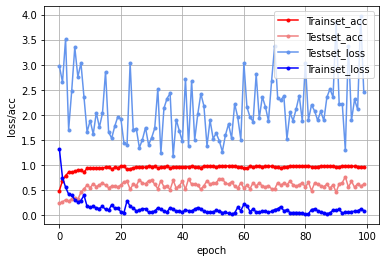

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

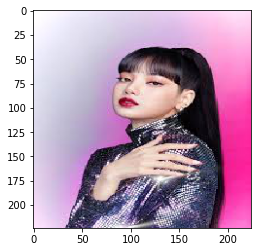

In [ ]:
plt.imshow(test_generator[0][0][0])

In [ ]:
class_names = ['로제', '리사', '제니', '지수']
predictions = finetune_model2.predict(test_generator[0][0])
score = tf.nn.softmax(predictions[0])

print(
    "{:.2f} %로 {}일 확률이 가장 높습니다."
    .format(100 * np.max(score), class_names[np.argmax(score)])
)

47.54 %로 리사일 확률이 가장 높습니다.
